In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition, preprocessing
from functions import *

In [2]:
# nombre de composant
n_comp = 6

In [3]:
# importation de l'échantillon
df = pd.read_csv('data/my_courses.csv', decimal='.', index_col=0)

In [4]:
df_pca = df[['inscription', 'progression', 'moyenneDeClasse', 'duree', 'difficulte',
       'nbChapitres', 'ratioQuizEvaluation', 'nbEvaluations']]

In [5]:
# préparation des données pour l'ACP
df_pca.fillna( df_pca.mean(), inplace=True);

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [6]:
df_pca.describe() # remplaceé les données manquantes par la moyenne des colonnes

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations
count,61.000000,61.000000,61.0,61.000000,61.000000,61.000000,61.0,61.000000
mean,662.833333,51.716667,0.0,14.763636,1.700000,16.050000,1.0,2.333333
std,309.488135,41.733317,0.0,9.991603,0.640312,9.709832,0.0,1.398412
min,119.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.0,0.000000
25%,508.000000,9.000000,0.0,8.000000,1.000000,11.000000,1.0,1.000000
50%,655.000000,48.000000,0.0,14.763636,2.000000,15.000000,1.0,3.000000
75%,892.000000,100.000000,0.0,20.000000,2.000000,19.000000,1.0,3.000000
max,1407.000000,100.000000,0.0,50.000000,3.000000,51.000000,1.0,5.000000


In [15]:
X = df_pca.values
names = df['idCours']
features = df.columns

In [16]:
# centrage et reduction des données
standardSaler = preprocessing.StandardScaler()
X_scaled = standardSaler.fit_transform(X)

In [17]:
X_scaled

array([[-1.77178537e+00,  1.16655075e+00,  0.00000000e+00,
         2.38525495e-02,  4.72409496e-01,  3.06337104e-01,
         0.00000000e+00, -2.40343819e-01],
       [-1.73268989e+00, -1.05621768e+00,  0.00000000e+00,
         2.38525495e-02,  4.72409496e-01,  5.14023276e-01,
         0.00000000e+00,  4.80687639e-01],
       [-1.74246376e+00, -1.24950189e+00,  0.00000000e+00,
        -4.80720613e-01, -1.10228882e+00, -3.16721412e-01,
         0.00000000e+00,  4.80687639e-01],
       [ 2.01396014e+00,  3.45092851e-01,  0.00000000e+00,
         1.53757204e+00, -1.10228882e+00,  1.76014031e+00,
         0.00000000e+00,  1.92275056e+00],
       [-1.54047046e+00, -4.14755702e-02,  0.00000000e+00,
         2.38525495e-02,  4.72409496e-01,  5.14023276e-01,
         0.00000000e+00,  1.20171910e+00],
       [-1.42318402e+00, -1.86438728e-01,  0.00000000e+00,
         5.28425712e-01,  4.72409496e-01, -1.09035240e-01,
         0.00000000e+00, -2.40343819e-01],
       [-1.25702824e+00,  3.692533

In [18]:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

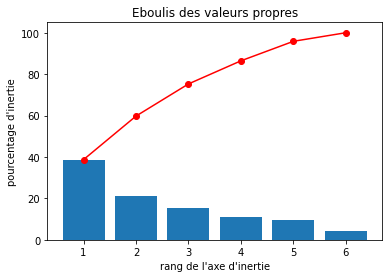

In [19]:
# Ebolis des valeurs propres
display_scree_plot(pca)

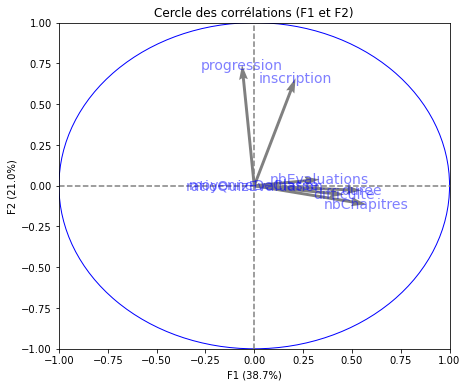

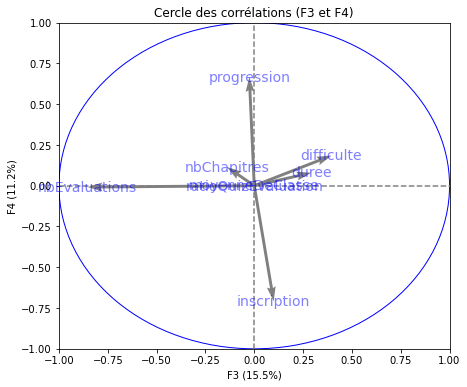

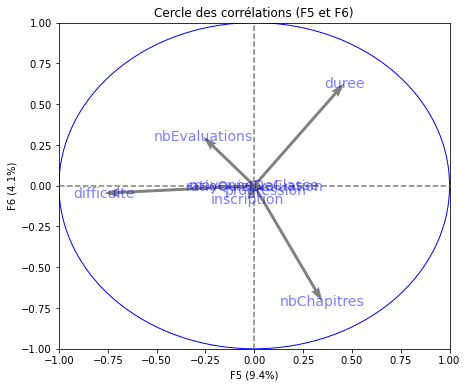

In [25]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0, 1), (2,3), (4,5)], labels=np.array(features))